# **ENGG680 - Introduction to Digital Engineering**
## *Lab Assignment 4: ML Applications - Vehicle Motion State Classification*

## Preliminary: Certificate of Work


*We, the undersigned, certify that this is our own work, which has been done expressly for this course, either without the assistance of any other party or where appropriate we have acknowledged the work of others. Further, we have read and understood the section in the university calendar on plagiarism/cheating/other academic misconduct and we are aware of the implications thereof. We request that the total mark for this assignment be distributed as follows among group members:*

|          | First Name | Last Name | Signature (Full Name, Date) | Hours | Contribution % |
|----------|------------|-----------|-----------------------------|-------|----------------|
| Member 1: | First Name | Last Name | Signature | Hours | Contribution |
| Member 2: | Tanvir | Last Name | Signature | Hours | Contribution |
| Member 3: | Janvi | Desai | Janvi Desai (29 Nov, 2024) | 5 | 25% |
| Member 4: | Tanzina | khan | Tanzina khan (29 Nov, 2024) | 5 | 25% |


---

## Section 1 - Motion Classification Using *All Features* Derived From Inertial Sensor Data (33 Marks)

---

### 1.1 Assignment datasets import (6 Marks)

---

In [1]:
#Drive Mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# some library imports
import pandas as pd

First load the following datasets into dataframes.
* *UrbanNav-HK_Whampoa-20210521_sensors.csv* to dataframe variable named *cv_set*. This dataset is to be used for model training and hyper parameter tuning.
* *UrbanNav-HK_TST-20210517_sensors.csv* to dataframe variable named *test_set1*. This is first independent test dataset.
* *2020-03-14-16-45-35.csv* to dataframe variable named *test_set2*. This is the second independent test dataset.

In [3]:
# (2 marks)
# TODO: Load cross validation/training dataset (UrbanNav-HK_Whampoa-20210521_sensors.csv) to 'cv_set' dataframe

# uncomment and compelete below
cv_set = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment 4/Hanif Vai/UrbanNav-HK_Whampoa-20210521_sensors.csv')

# TODO: Load UrbanNav-HK_TST-20210517_sensors.csv to 'test_set1' dataframe
test_set1 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment 4/Hanif Vai/UrbanNav-HK_TST-20210517_sensors.csv')

# TODO: Load 2020-03-14-16-45-35.csv to 'test_set2' dataframe
test_set2 = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Assignment 4/Hanif Vai/2020-03-14-16-45-35.csv')

For the *cv_set*, look at the dataframe head and info, and print the list of all columns. The *test_set1* and *test_set2* have the same schema as *cv_set*, however, have different number of rows (samples).

In [4]:
# TODO: Display first two rows of cv_set
# (1 mark)
print(cv_set.head(2))

     ax_sum    ay_sum    az_sum    gx_sum    gy_sum    gz_sum     a_sum  \
0 -0.003929 -0.093081  9.789349 -0.002649  0.001406 -0.001391  9.797418   
1 -0.000966 -0.092417  9.789095 -0.001806  0.000103 -0.001943  9.798815   

      g_sum        ax_var        ay_var  ...     g_min    ax_max    ay_max  \
0  0.022554  8.046094e-07  1.319665e-07  ...  0.000003  0.001496  0.000544   
1  0.021731  1.032619e-06  1.073067e-07  ...  0.000006  0.001865  0.000615   

     az_max    gx_max    gy_max    gz_max     a_max     g_max  motion_state  
0  0.024992  0.000110  0.000075  0.000078  0.024997  0.000187          rest  
1  0.024828  0.000124  0.000098  0.000090  0.024829  0.000144          rest  

[2 rows x 33 columns]


In [5]:
# TODO: Load the info method of cv_set
# (1 mark)
cv_set.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1534 entries, 0 to 1533
Data columns (total 33 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ax_sum        1534 non-null   float64
 1   ay_sum        1534 non-null   float64
 2   az_sum        1534 non-null   float64
 3   gx_sum        1534 non-null   float64
 4   gy_sum        1534 non-null   float64
 5   gz_sum        1534 non-null   float64
 6   a_sum         1534 non-null   float64
 7   g_sum         1534 non-null   float64
 8   ax_var        1534 non-null   float64
 9   ay_var        1534 non-null   float64
 10  az_var        1534 non-null   float64
 11  gx_var        1534 non-null   float64
 12  gy_var        1534 non-null   float64
 13  gz_var        1534 non-null   float64
 14  a_var         1534 non-null   float64
 15  g_var         1534 non-null   float64
 16  ax_min        1534 non-null   float64
 17  ay_min        1534 non-null   float64
 18  az_min        1534 non-null 

In [6]:
# TODO: Display the number of rows and columns  of all three datasets
# (1 mark)
print(f"'cv_set' has {cv_set.shape[0]} rows and {cv_set.shape[1]} columns")
print(f"'test_set1' has {test_set1.shape[0]} rows and {test_set1.shape[1]} columns")
print(f"'test_set2' has {test_set2.shape[0]} rows and {test_set2.shape[1]} columns")

'cv_set' has 1534 rows and 33 columns
'test_set1' has 783 rows and 33 columns
'test_set2' has 297 rows and 33 columns


In [7]:
# TODO: Display all columns in cv_set
# (1 mark)
print(cv_set.columns)  # Display the names of all columns in the cv_set DataFrame

Index(['ax_sum', 'ay_sum', 'az_sum', 'gx_sum', 'gy_sum', 'gz_sum', 'a_sum',
       'g_sum', 'ax_var', 'ay_var', 'az_var', 'gx_var', 'gy_var', 'gz_var',
       'a_var', 'g_var', 'ax_min', 'ay_min', 'az_min', 'gx_min', 'gy_min',
       'gz_min', 'a_min', 'g_min', 'ax_max', 'ay_max', 'az_max', 'gx_max',
       'gy_max', 'gz_max', 'a_max', 'g_max', 'motion_state'],
      dtype='object')


In all three dataframes, target vector is stored in the *motion_state* column. All other columns are features.

___

### 1.2 - Grid Search with Cross Validation (18 Marks)

___

#### 1.2.1 - Extract all features and target from cv_set

___

From the *cv_set*, load the target vector stored in the *motion_state* column into a new variable *y*

In [8]:
# TODO - Load target vector into y
# (1 mark)
y = cv_set['motion_state']

From *cv_set*, load all features, that is all columns except for the target vector, in a new dataframe variable *X*

In [9]:
# TODO - Load all features from cv_set to X
# (2 marks)
X = cv_set.drop(columns=['motion_state'])
X.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.003929,-0.093081,9.789349,-0.002649,0.001406,-0.001391,9.797418,0.022554,8.046094e-07,1.319665e-07,...,0.023871,0.000003,0.001496,0.000544,0.024992,0.000110,0.000075,0.000078,0.024997,0.000187
1,-0.000966,-0.092417,9.789095,-0.001806,0.000103,-0.001943,9.798815,0.021731,1.032619e-06,1.073067e-07,...,0.024153,0.000006,0.001865,0.000615,0.024828,0.000124,0.000098,0.000090,0.024829,0.000144


___

#### 1.2.2 - Configure and Perform Grid Search with Cross-Validation

___

In [10]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler, RobustScaler, MinMaxScaler, Normalizer
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

The dataset *(X, y)*, must be split into training/validation *(X_train, y_train)* and testing *(X_test, y_test)* sets. Use the `train_test_split` function from sklearn to create the split, where  **30%** of data is used for testing. Set the `random_state=42`, and `stratify=y`.  

In [11]:
# TODO - Perform test/train split
# (1 mark)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Initialize a `Pipeline`, consisting of a *scaler* and a *classifer*, set the default values to *StandardScaler()*, and *SVC()*, respectively.

In [12]:
# TODO - Initialize Pipeline into variable pipe
# (2 marks)
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Standardizes the features
    ('classifier', SVC())         # Support Vector Classifier
])

Define the grid search configuration (*param_grid*) for training and hyper parameter tuning of the *support vector classifier*. Tune, the hyper-parameter *C*, over the interval `C=[0.01, 0.1, 1 ,10,100]`, *gamma*, over the interval `gamma=[0.001, 0.01, 0.1,1]`, and use the *radial basis function* as the kernel. For the *scaler* parameter, test with the `StandardScaler`, `RobustScaler`, and `None` options.

In [13]:
# TODO - Setup grid set
# (4 marks)

param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Scaler options
    'classifier__C': [0.01, 0.1, 1, 10, 100],           # Hyperparameter C
    'classifier__gamma': [0.001, 0.01, 0.1, 1],         # Hyperparameter gamma
    'classifier__kernel': ['rbf']                       # Radial Basis Function kernel
}

In [14]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 1.2.3 - Visualize Grid Search Results

___

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [15]:
# TODO: Print the results from the grid search
# (2 marks)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(
    max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(
    grid.best_score_))
print("Test-set score: {:.2f}".format(
    grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 1.00
Best cross-validation validation score: 0.95
Test-set score: 0.96


Display the confusion matrix and print the classification report for the trained model. Use the *(X_test, y_test)* dataset. **Hint** - You can use your code from assignment 3.

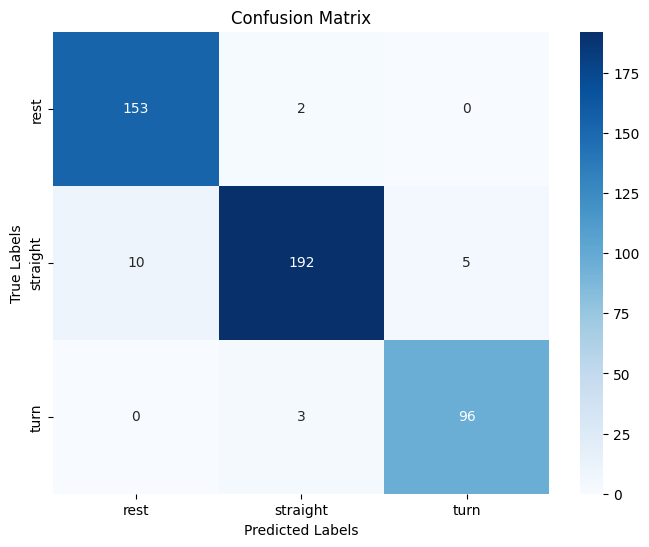

Classification Report:

              precision    recall  f1-score   support

        rest       0.94      0.99      0.96       155
    straight       0.97      0.93      0.95       207
        turn       0.95      0.97      0.96        99

    accuracy                           0.96       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.96      0.96      0.96       461



In [16]:
# TODO - Display confusion matrix and print classification report for (X_test, y_test)
# (2 marks)
# Import libraries
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Predict the labels for X_test
y_pred = grid.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

# Print the classification report
print("Classification Report:\n")
print(classification_report(y_test, y_pred))

___

#### 1.2.4 - Questions

1. Comment on the fit of the model to the dataset? (2 marks)
2. In the grid search, are the intervals used for *C* and *gamma* hyperparameters suitable? Why or why not? (2 marks)

#### 1.2.4 - Answers
1. The model fits the dataset well, achieving high precision, recall, and F1-scores (above 0.94) for all classes. The confusion matrix shows minimal misclassifications, indicating the model generalizes effectively.
2.  Yes, the intervals for C and gamma are suitable. They cover a wide range, enabling the model to balance underfitting and overfitting, as evidenced by the high classification performance.

___

### 1.3 - Model Evaluation on Test Datasets 1 and 2 (9 Marks)

___

#### 1.3.1 - Extract all features and targets from test datasets

Next, the model trained in 1.2 will be tested on independent datasets, that is *test_set1* and *test_set2*. <br>
The test_sets must be seperated into features (Xs) and targets (ys).

In [17]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# (1 marks)
y1 = test_set1['motion_state']  # Target vector
X1 = test_set1.drop('motion_state', axis=1)  # Features

# Display the first two rows of the features
X1.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,0.264465,0.089904,9.786930,-0.002305,0.000218,-0.001143,9.801661,0.025634,0.000001,7.749919e-08,...,0.024056,0.000003,0.002506,0.000845,0.024884,0.000155,0.000078,0.000069,0.024886,0.000170
1,0.264300,0.088882,9.788127,-0.001865,-0.000523,-0.001999,9.802481,0.025218,0.000001,9.243000e-08,...,0.024084,0.000007,0.002427,0.000949,0.024881,0.000201,0.000095,0.000076,0.024883,0.000201


In [18]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2.drop('motion_state', axis=1)
X2.head(2)

,ax_sum,ay_sum,az_sum,gx_sum,gy_sum,gz_sum,a_sum,g_sum,ax_var,ay_var,...,a_min,g_min,ax_max,ay_max,az_max,gx_max,gy_max,gz_max,a_max,g_max
0,-0.046400,0.305907,9.791451,-0.002184,0.001311,-0.001901,9.800683,0.012437,0.000002,3.020959e-07,...,0.048406,0.000007,0.002575,0.002993,0.049701,0.000094,0.000115,0.000080,0.049764,0.000142
1,-0.050073,0.311947,9.785619,-0.003369,0.001898,-0.002051,9.797741,0.013805,0.000003,6.859937e-07,...,0.047696,0.000013,0.003880,0.004106,0.050477,0.000140,0.000140,0.000083,0.050763,0.000151


____

#### 1.3.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [19]:
# TODO - Print test score accuracies for test_set1 and test_set2
# (1 marks)

# Predict on test_set1 and test_set2
test_set1_score = grid.best_estimator_.score(X1, y1)
test_set2_score = grid.best_estimator_.score(X2, y2)

# Print the test scores
print("test_set1 score: {:.2f}".format(test_set1_score))
print("test_set2 score: {:.2f}".format(test_set2_score))

test_set1 score: 0.92
test_set2 score: 0.25


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

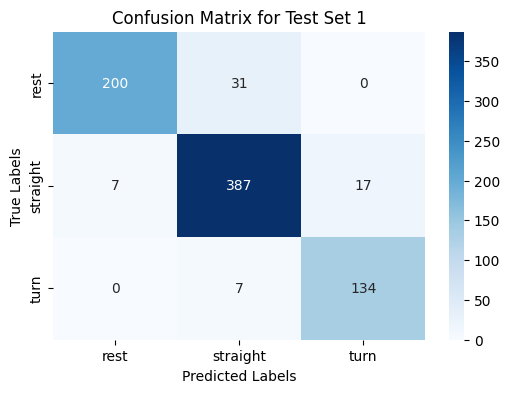

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.97      0.87      0.91       231
    straight       0.91      0.94      0.93       411
        turn       0.89      0.95      0.92       141

    accuracy                           0.92       783
   macro avg       0.92      0.92      0.92       783
weighted avg       0.92      0.92      0.92       783



In [20]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# (1 marks)

# Generate predictions for test_set1
y1_pred = grid.best_estimator_.predict(X1)

# Display confusion matrix
conf_matrix = confusion_matrix(y1, y1_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['rest', 'straight', 'turn'], yticklabels=['rest', 'straight', 'turn'])
plt.title("Confusion Matrix for Test Set 1")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report
print("Classification Report for Test Set 1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

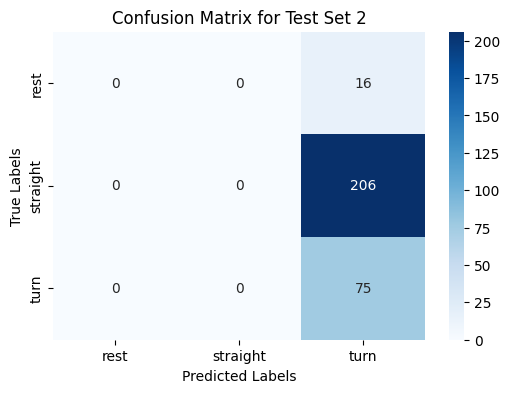

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       0.00      0.00      0.00        16
    straight       0.00      0.00      0.00       206
        turn       0.25      1.00      0.40        75

    accuracy                           0.25       297
   macro avg       0.08      0.33      0.13       297
weighted avg       0.06      0.25      0.10       297



In [21]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

# Generate predictions for test_set2
y2_pred = grid.best_estimator_.predict(X2)

# Display confusion matrix
conf_matrix2 = confusion_matrix(y2, y2_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix2, annot=True, fmt='d', cmap='Blues', xticklabels=['rest', 'straight', 'turn'], yticklabels=['rest', 'straight', 'turn'])
plt.title("Confusion Matrix for Test Set 2")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report with zero_division parameter
print("Classification Report for Test Set 2:")
print(classification_report(y2, y2_pred, zero_division=0))

___

#### 1.3.3 - Questions

**Based on results so far**
1. Comment on the model's performances on the datasets *(X_test, y_test)*, *(X1, y1)*, *(X2, y2)*? A significant difference in performance should be observed, what is this an example of? (3 marks)
1. Provide and explain potential causes for the observed behaviour in performance? (3 marks)

#### 1.3.3 - Answers
1. The model shows significantly different performances across the datasets:

*   **(X_test, y_test):** The model performs exceptionally well on the dataset (X_test, y_test), achieving a high test-set accuracy of 0.96 and F1-scores over 0.94 for all classes, indicating a good fit to the original dataset.
* **(X1, y1):** Performance is slightly lower compared to (X_test, y_test) but still strong, with an overall accuracy of 92% and F1-scores over 0.90 for all classes. The model generalizes reasonably well to this dataset.
* **(X2, y2):** Performance drops drastically, with an accuracy of only 25%. The model fails to predict two of the three classes (rest and straight), predicting only turn with a precision of 0.25. This drastic drop in performance suggests poor generalization and severe overfitting to the training data.

2. Causes for the observed behaviour in performance
* **Domain Shift:** Differences in feature distributions between training data and (X1, y1) or (X2, y2) lead to poor generalization, especially for (X2, y2).

* **Class Imbalance:** Test set 2 has imbalanced classes, making the model fail to predict underrepresented labels like rest and straight.

* **Overfitting:** The model may overfit the training data, performing well on similar datasets but struggling with unseen or dissimilar data.

___

## Section 2 - Classification Using *Selected Features* Derived From Inertial Sensor Data (12 Marks)

In this second section, an *SVC* model will be trained and tuned using grid search, however, only *selected features* will be used.

___

### 2.1 Grid Search with Cross Validation (5 Marks)

___

#### 2.1.1 Extract *selected* features and target from *cv_set*

From the *cv_set* dataframe, extract the selected features, listed below, and load them in a new dataframe *X*.
* *ax_var* - variance of accelerometer readings in x
* *ay_var* - variance of accelerometer readings in y
* *az_sum* - sum of accelerometer z readings
* *a_sum* - sum of the norm of accelerometer x, y, z readings
* *gz_var* - variance of gyroscope reading in z

In [22]:
# TODO - Load selected features from cv_set to X
# (1 marks)
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']
X = cv_set[selected_features]  # Extract only the selected feature columns

X.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,8.046094e-07,1.319665e-07,9.789349,9.797418,7.446916e-10
1,1.032619e-06,1.073067e-07,9.789095,9.798815,6.983481e-10


In [23]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']

___

#### 2.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the selected feature set.

In [24]:
# TODO - Perform model training and tuning using `GridSearchCV`
# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Default scaler
    ('classifier', SVC())          # Support Vector Classifier
])

# Define the parameter grid
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Scaler options
    'classifier__C': [0.01, 0.1, 1, 10, 100],           # Regularization parameter
    'classifier__gamma': [0.001, 0.01, 0.1, 1],         # Kernel coefficient
    'classifier__kernel': ['rbf']                       # RBF kernel
}

# Perform grid search with cross-validation
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,                      # 5-fold cross-validation
    scoring='accuracy',        # Use accuracy as the evaluation metric
    return_train_score=True    # Store training scores for analysis
)

# Train the model using the selected feature set
grid.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 2.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [25]:
# TODO: Print the results from the grid search
print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(
    max(grid.cv_results_['mean_train_score'])))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X, y)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.01, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.97
Best cross-validation validation score: 0.82
Test-set score: 0.84


Display the confusion matrix and print the classification report for the trained model using the *test* split.

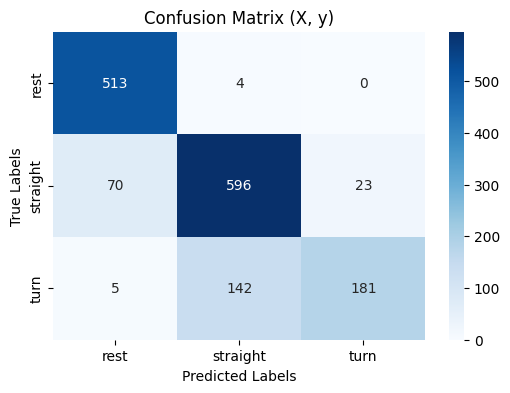

Classification Report
              precision    recall  f1-score   support

        rest       0.87      0.99      0.93       517
    straight       0.80      0.87      0.83       689
        turn       0.89      0.55      0.68       328

    accuracy                           0.84      1534
   macro avg       0.85      0.80      0.81      1534
weighted avg       0.84      0.84      0.83      1534



In [26]:
# TODO - Display confusion matrix and print classification reports
# Generate predictions
y_pred = grid.best_estimator_.predict(X)

# Display confusion matrix
conf_matrix3 = confusion_matrix(y, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=['rest', 'straight', 'turn'], yticklabels=['rest', 'straight', 'turn'])
plt.title("Confusion Matrix (X, y)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report with zero_division parameter
print("Classification Report")
print(classification_report(y, y_pred, zero_division=0))

___

#### 2.1.4 - Question


1. Consider the differences between the performance on the training/cross-validation dataset for section 1 (1.2.3) and section 2 (2.1.3). Which model is a better fit based on *just these two evaluations*? (4 marks)

#### 2.1.4 Answer
* The Section 1 model (1.2.3) is a better fit based on these evaluations because:

* Training Performance: Section 1 achieves a perfect training score (1.00), while Section 2 has a slightly lower score (0.97), indicating Section 1 learns the training data more effectively.

* Validation Performance: Section 1 shows stronger generalization with a validation score of 0.95 compared to Section 2’s 0.82, highlighting better performance on unseen data during cross-validation.

Overall, Section 1 maintains superior generalization outperforming Section 2 and demonstrating that the model effectively balances underfitting and overfitting.


___

### 2.2 - Model Evaluation on Test Datasets 1 and 2 (7 Marks)

___

#### 2.2.1 - Extract selected features and targets from test datasets

The model trained in 2.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into the selected features and target vectors *(X1, y1)* and (X2,)

In [27]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# (1 marks)
selected_features = ['ax_var', 'ay_var', 'az_sum', 'a_sum', 'gz_var']  # Selected features

y1 = test_set1['motion_state']  # Load the target vector
X1 = test_set1[selected_features]  # Load only the selected features

# Display the first two rows of X1 to verify
X1.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000001,7.749919e-08,9.786930,9.801661,7.727190e-10
1,0.000001,9.243000e-08,9.788127,9.802481,8.871433e-10


In [28]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
y2 = test_set2['motion_state']  # Load the target vector
X2 = test_set2[selected_features]  # Load only the selected features

# Display the first two rows of X2 to verify
X2.head(2)

,ax_var,ay_var,az_sum,a_sum,gz_var
0,0.000002,3.020959e-07,9.791451,9.800683,1.405038e-09
1,0.000003,6.859937e-07,9.785619,9.797741,1.164381e-09


___

#### 2.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [29]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.85
test_set2 score: 0.81


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

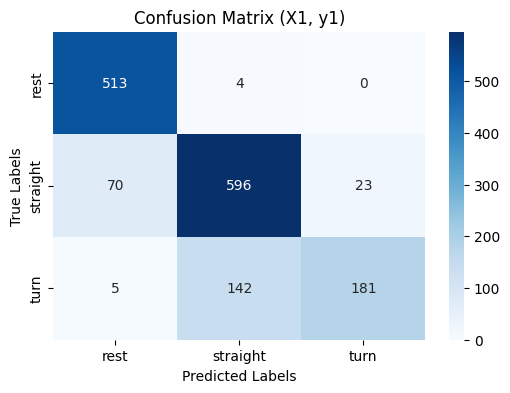

Classification Report
              precision    recall  f1-score   support

        rest       0.91      0.99      0.95       231
    straight       0.86      0.85      0.86       411
        turn       0.70      0.62      0.66       141

    accuracy                           0.85       783
   macro avg       0.82      0.82      0.82       783
weighted avg       0.85      0.85      0.85       783



In [30]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

# Generate predictions
y1_pred = grid.best_estimator_.predict(X1)

# Display confusion matrix
conf_matrix4 = confusion_matrix(y1, y1_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=['rest', 'straight', 'turn'], yticklabels=['rest', 'straight', 'turn'])
plt.title("Confusion Matrix (X1, y1)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report with zero_division parameter
print("Classification Report")
print(classification_report(y1, y1_pred, zero_division=0))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

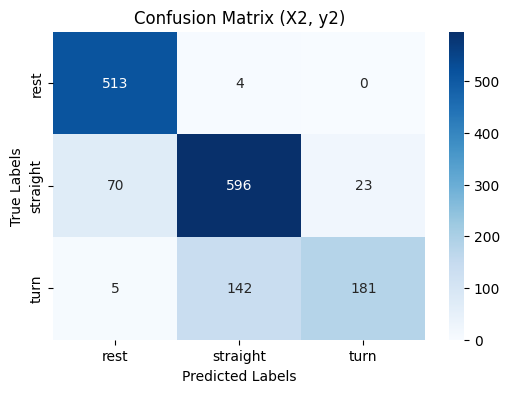

Classification Report
              precision    recall  f1-score   support

        rest       1.00      0.88      0.93        16
    straight       0.90      0.82      0.86       206
        turn       0.61      0.79      0.69        75

    accuracy                           0.81       297
   macro avg       0.84      0.83      0.83       297
weighted avg       0.84      0.81      0.82       297



In [31]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
y2_pred = grid.best_estimator_.predict(X2)

# Display confusion matrix
conf_matrix4 = confusion_matrix(y2, y2_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix3, annot=True, fmt='d', cmap='Blues', xticklabels=['rest', 'straight', 'turn'], yticklabels=['rest', 'straight', 'turn'])
plt.title("Confusion Matrix (X2, y2)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print classification report with zero_division parameter
print("Classification Report")
print(classification_report(y2, y2_pred, zero_division=0))

___

#### 2.2.3 Questions

1. For section 2, compare between the model's performance on the training/validation (2.1) set to the the performance on the two testing sets (2.2). How does the model fit? (3 marks)
1. Compare the models' performances and fits between section 1 and section 2, and consider all three datasets. (3 marks)

#### 2.2.3 Answers
**1. Answer:** The results indicate that the model in Section 2 generalizes well, but there is a slight drop in performance between the training/validation set (2.1) and the testing sets (2.2):
**Training/Validation Performance:**
* Cross-Validation Train Score (0.97):: The model fits the training data very well.
* Cross-Validation Validation Score (0.82): Indicates the model performs well on unseen data during cross-validation.
* Test-Set Score (0.84): The model performs well on the test set, indicating good generalization.

**Testing Performance:**
* Test-set1 Score (0.85): Slightly better than the cross-validation score, indicating good generalization to similar data.
* Test-set2 Score (0.81): Slightly lower than the validation score, suggesting the model generalizes reasonably well even on data that might differ slightly in distribution.

Overall, the model is a good fit and performs well, with minor opportunities for further optimization to improve generalization across diverse datasets.


**2. Answer:** The Section 1 model outperforms the Section 2 model across all datasets:

**Section 1:**
* The model performs excellently on (X_test, y_test) with 96% accuracy and F1-scores above 0.94 but declines sharply on (X2, y2) (25% accuracy), indicating poor generalization to differing data. Performance on (X1, y1) (92% accuracy) remains strong but lower than on (X_test, y_test). Overall, Section 1 uses the full feature set, enabling it to capture complex patterns effectively but faces generalization issues with (X2, y2).

**Section 2:**
* Performs reasonably well with training (0.97), validation (0.82), and test-set scores (0.84)Test-set1 (0.85) shows good generalization to similar data, while test-set2 (0.81) reflects reasonable performance on slightly differing data. Section B highlights consistent generalization but relies on a reduced feature set, limiting its ability to model the data’s complexity.

Overall, Section 1 is better for (X_test, y_test) and (X1, y1), as it achieves higher accuracy and F1-scores, making it ideal for complex datasets similar to the training data. However, Section B performs better on (X2, y2) with reduced features, as it generalizes more consistently than section 1.

____

## Section 3 - Classification Using *Group Selected Features* From Inertial Sensor Data (10 Marks)

Once again, an *SVC* model is to be trained and tuned using grid search. However, you must select which features to use from the ones provided in *cv_set*.  

____

### 3.1 Grid Search with Cross Validation (4 Marks)

___

#### 3.1.1 Extract *Group Selected* features and target from *cv_set*

In [32]:
#Group features selection by PCA methods
#Import Libraries
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load features (exclude motion_state)
X = cv_set.drop(columns=['motion_state'])

# Standardize the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA()
pca.fit(X_scaled)

# Get loadings (components matrix)
loadings = abs(pca.components_)

# Summing loadings across top components (optional, analyze top few PCs)
importance = loadings[:3].sum(axis=0)  # Sum of loadings in top 3 PCs
top_features_indices = importance.argsort()[::-1][:5]  # Indices of top 5 features

# Get feature names
selected_features = [X.columns[i] for i in top_features_indices]
print("Top 5 selected features from PCA:", selected_features)


Top 5 selected features from PCA: ['g_sum', 'g_max', 'gz_min', 'gz_sum', 'g_min']


**Question**
1. Please list the features that you have selected and explain *why you have chosen* these features? (4 marks)


**Answer**
**1.   Selected features:**

* g_sum
* g_max
* gz_min
* gz_sum
* g_min

**Reason for Selection:**
* The features were selected using the PCA method, which identified these as having the highest contribution to variance in the dataset. They capture critical rotational dynamics essential for distinguishing vehicle motion states like rest, straight, and turn. This approach ensures a balance between model simplicity and predictive accuracy by focusing on the most informative attributes.


In [33]:
# TODO - Load group selected features from cv_set to X
group_selected_features = ['g_sum', 'g_max', 'gz_min', 'gz_sum', 'g_min']
X = cv_set[group_selected_features]

X.head(2)

,g_sum,g_max,gz_min,gz_sum,g_min
0,0.022554,0.000187,-0.000082,-0.001391,0.000003
1,0.021731,0.000144,-0.000090,-0.001943,0.000006


In [34]:
# TODO - Load motion_state column (target vector) into y
y = cv_set['motion_state']


___

#### 3.1.2 - Configure and Perform Grid Search with Cross-Validation

Follow the steps from **1.2.2** and perform model training and tuning using the group selected feature set.

In [35]:
# TODO - Perform model training and tuning using `GridSearchCV`
# Define the pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),  # Default scaler
    ('classifier', SVC())          # Support Vector Classifier
])

# Define the parameter grid
param_grid = {
    'scaler': [StandardScaler(), RobustScaler(), None],  # Scaler options
    'classifier__C': [0.01, 0.1, 1, 10, 100],           # Regularization parameter
    'classifier__gamma': [0.001, 0.01, 0.1, 1],         # Kernel coefficient
    'classifier__kernel': ['rbf']                       # Radial Basis Function kernel
}

# Perform grid search with cross-validation
grid = GridSearchCV(
    estimator=pipe,
    param_grid=param_grid,
    cv=5,                      # 5-fold cross-validation
    scoring='accuracy',        # Use accuracy as the evaluation metric
    return_train_score=True    # Store training scores for analysis
)

# Train the model using the group-selected feature set
grid.fit(X, y)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 3.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [36]:
# TODO: Print the results from the grid search
# Split data into training and testing sets for test set evaluation
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Fit the model on the training data
grid.fit(X_train, y_train)

print("Best params:\n{}\n".format(grid.best_params_))
print("Best cross-validation train score: {:.2f}".format(
    max(grid.cv_results_['mean_train_score'])
))
print("Best cross-validation validation score: {:.2f}".format(grid.best_score_))
print("Test-set score: {:.2f}".format(grid.score(X_test, y_test)))

Best params:
{'classifier__C': 100, 'classifier__gamma': 0.1, 'classifier__kernel': 'rbf', 'scaler': RobustScaler()}

Best cross-validation train score: 0.95
Best cross-validation validation score: 0.92
Test-set score: 0.95


Display the confusion matrix and print the classification report for the trained model using the *test* split.

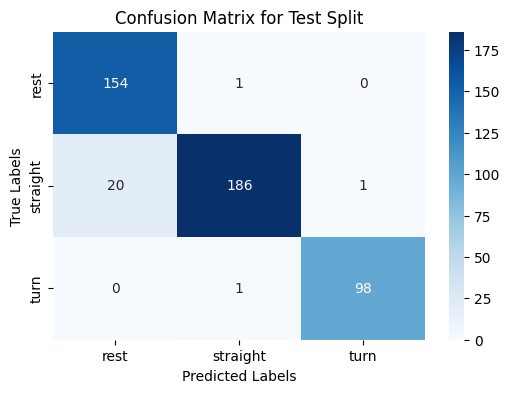

Classification Report for Test Split:
              precision    recall  f1-score   support

        rest       0.89      0.99      0.94       155
    straight       0.99      0.90      0.94       207
        turn       0.99      0.99      0.99        99

    accuracy                           0.95       461
   macro avg       0.95      0.96      0.96       461
weighted avg       0.95      0.95      0.95       461



In [37]:
# TODO - Display confusion matrix and print classification report
# Predict the labels for the test split
y_test_pred = grid.predict(X_test)

# Compute the confusion matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title("Confusion Matrix for Test Split")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print the classification report
print("Classification Report for Test Split:")
print(classification_report(y_test, y_test_pred))

___

### 3.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 3.2.1 - Extract group selected features and targets from test datasets

The model trained in 3.1 is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into group selected features and target vectors *(X1, y1)* and *(X2,y2)*

In [38]:
# TODO - Load the target vector from test_set1 into y1, and the group selected features from test_set1 into X1
y1 = test_set1['motion_state']
X1 = test_set1[group_selected_features]
X1.head(2)

,g_sum,g_max,gz_min,gz_sum,g_min
0,0.025634,0.000170,-0.000102,-0.001143,0.000003
1,0.025218,0.000201,-0.000094,-0.001999,0.000007


In [39]:
# TODO - Load the target vector from test_set2 into y2, and the group selected features from test_set2 into X2
y2 = test_set2['motion_state']
X2 = test_set2[group_selected_features]
X2.head(2)

,g_sum,g_max,gz_min,gz_sum,g_min
0,0.012437,0.000142,-0.000122,-0.001901,0.000007
1,0.013805,0.000151,-0.000098,-0.002051,0.000013


___

#### 3.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [40]:
# TODO - Print test score accuracies for test_set1 and test_set2
print("test_set1 score: {:.2f}".format(grid.score(X1, y1)))
print("test_set2 score: {:.2f}".format(grid.score(X2, y2)))

test_set1 score: 0.77
test_set2 score: 0.91


Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

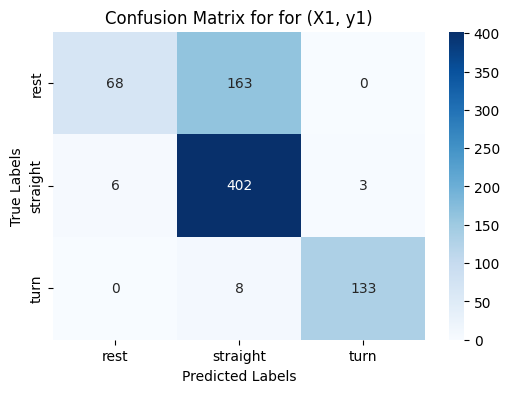

Classification Report for Test Set 1:
              precision    recall  f1-score   support

        rest       0.92      0.29      0.45       231
    straight       0.70      0.98      0.82       411
        turn       0.98      0.94      0.96       141

    accuracy                           0.77       783
   macro avg       0.87      0.74      0.74       783
weighted avg       0.82      0.77      0.73       783



In [69]:
# TODO - Display confusion matrix and print classification report for (X1, y1)
# Predict the labels for test_set1
y1_pred = grid.predict(X1)

# Compute the confusion matrix
conf_matrix1 = confusion_matrix(y1, y1_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title("Confusion Matrix for for (X1, y1)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print the classification report
print("Classification Report for Test Set 1:")
print(classification_report(y1, y1_pred))

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

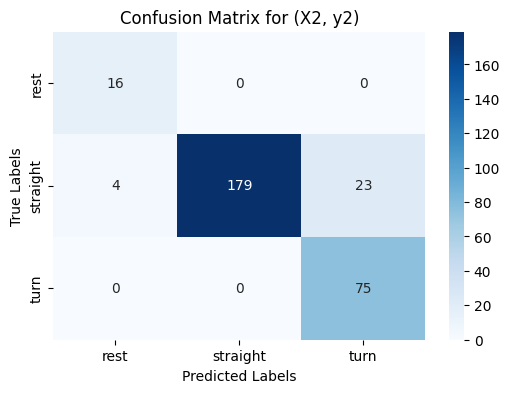

Classification Report for Test Set 2:
              precision    recall  f1-score   support

        rest       0.80      1.00      0.89        16
    straight       1.00      0.87      0.93       206
        turn       0.77      1.00      0.87        75

    accuracy                           0.91       297
   macro avg       0.86      0.96      0.90       297
weighted avg       0.93      0.91      0.91       297



In [42]:
# TODO - Display confusion matrix and print classification report for (X2, y2)
# Predict the labels for test_set1
y2_pred = grid.predict(X2)

# Compute the confusion matrix
conf_matrix1 = confusion_matrix(y2, y2_pred)

# Display the confusion matrix using a heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix1, annot=True, fmt='d', cmap='Blues', xticklabels=grid.classes_, yticklabels=grid.classes_)
plt.title("Confusion Matrix for (X2, y2)")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

# Print the classification report
print("Classification Report for Test Set 2:")
print(classification_report(y2, y2_pred))

___

#### 3.2.3 Questions

1. Based on the observations across all three datasets, compare the performance of the model trained in this section to: (3 marks)
    1. Model trained in Section 1 using *all features*.
    1. Model trained in Section 2 using *selected features*.

2. Please proivde potential explanations for the differences observed in models' performances across the three sections. (3 marks)

#### 3.2.3 Answers
**1.1. Section 1 vs Section 3:**
* Section 3 achieves a similar test-set score (0.95) to Section 1 (0.96) with fewer features, indicating comparable accuracy.
* Validation score in Section 3 (0.92) is slightly lower, but the model generalizes well with reduced complexity.

**1.2. Section 2 vs Section 3:**
* Section 3 outperforms Section 2 in both validation (0.92 vs. 0.82) and test-set scores (0.95 vs. 0.84).
* PCA-selected features in Section 3 are more informative, resulting in better generalization compared to manual selection in Section 2.

**2. Potential Explanations for Differences**
* Section 3’s PCA-selected features retain the most variance, enhancing performance while Section 2’s manual selection may miss key patterns, reducing accuracy.
* Section 1 uses all features, slightly improving scores but increasing complexity, conversely, section 3 balances feature reduction and accuracy, making it more efficient.
* PCA in Section 3 ensures top-performing features, while manual selection in Section 2 lacks the same rigor.

____

## Section 4 - Classification Using Principal Components of Features From Inertial Sensor Data (10 Marks)

____

### 4.1 Principal Component Analysis (PCA) Search with Cross Validation (4 Marks)

___

#### 4.1.1 Extract *ALL* features and target from *cv_set*

In [43]:
# TODO - Load all features from cv_set to X
# X =
X.head(2)

,g_sum,g_max,gz_min,gz_sum,g_min
0,0.022554,0.000187,-0.000082,-0.001391,0.000003
1,0.021731,0.000144,-0.000090,-0.001943,0.000006


In [44]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 4.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning for an `SVC` model. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [45]:
# TODO - Perform model training and tuning using `GridSearchCV`
# X_train, X_test, y_train, y_test =

In the `Pipeline` add an entry *'pca'* to apply `PCA`.

In [46]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 marks)
# pipe =

Similar to previous sections, define the grid search configuration (*param_grid*). Add *n_components* hyper parameter tuning for PCA, and search over the values `n_components=[4,7,11,14,16]`.  

In [47]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =

In [48]:
# Perform the grid search to train model and tune hyper parameters
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 4.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [49]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [50]:
# TODO - Display confusion matrix and print classification report

___

### 4.2 - Model Evaluation on Test Datasets 1 and 2 (6 Marks)

___

#### 4.2.1 - Extract group selected features and targets from test datasets

In [51]:
# TODO - Load the target vector from test_set1 into y1, and all features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

,g_sum,g_max,gz_min,gz_sum,g_min
0,0.025634,0.000170,-0.000102,-0.001143,0.000003
1,0.025218,0.000201,-0.000094,-0.001999,0.000007


In [52]:
# TODO - Load the target vector from test_set2 into y2, and all features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

,g_sum,g_max,gz_min,gz_sum,g_min
0,0.012437,0.000142,-0.000122,-0.001901,0.000007
1,0.013805,0.000151,-0.000098,-0.002051,0.000013


___

#### 4.2.2 - Visualize Results

In [53]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

In [54]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [55]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 4.2.3 - Questions

1. Based on the observations across all three datasets, compare the performance of the model with PCA, trained in this section to: (4 marks)
    * Model trained in Section 1 using *all features*.
    * Model trained in Section 2 using *selected features*.
    * Model trained in Section 3 using *group selected features*

2. Please provide potential explanations for the differences observed in models' performances across between section 1 and 4. (2 marks)

#### 4.2.3 - Answers

____

## Section 5 - Classification Using *Pre Selected Features* Derived From Inertial Sensor Data (10 Marks)

___

Now, a second classifer is to be trained and tuned using grid search. The **selected features from section 2** must be used. You may choose from one of the algorithms discussed that class listed below.
1. Random Forest
1. K-Nearest Neighbors
1. Gradient Boosting Machines
1. Neural Networks

____

### 5.1 Grid Search with Cross Validation (6 Marks)

___

#### 5.1.1 Extract *Selected* features and target from *cv_set*

**Questions**
1. Please list the ML model that you have selected . And explain *why you have chosen* this model? (2 marks)

**Answer**
1.

In [56]:
# TODO - Load group selected features from cv_set to X
# X =
X.head(2)

,g_sum,g_max,gz_min,gz_sum,g_min
0,0.022554,0.000187,-0.000082,-0.001391,0.000003
1,0.021731,0.000144,-0.000090,-0.001943,0.000006


In [57]:
# TODO - Load motion_state column (target vector) into y
# y =

___

#### 5.1.2 - Configure and Perform Grid Search with Cross-Validation

Similar to the steps from **1.2.2** and perform model training and tuning using for the model selected. Perform the `train_test_split`, initiate a `Pipeline`, then define the *Parameters* for `GridSearchCV`. Finally, perfrom the grid search.

In [58]:
# TODO - Perform train/test split

In [59]:
# Perform any missing imports

# TODO - Initiate the pipeline
# (1 mark)
# pipe =

In [60]:
# TODO - Define the parameter grid for your model
# (3 marks)
# param_grid =

In [61]:
# TODO - Perform the grid search
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy', return_train_score=True)
grid.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('classifier', SVC())]),
             param_grid={'classifier__C': [0.01, 0.1, 1, 10, 100],
                         'classifier__gamma': [0.001, 0.01, 0.1, 1],
                         'classifier__kernel': ['rbf'],
                         'scaler': [StandardScaler(), RobustScaler(), None]},
             return_train_score=True, scoring='accuracy')

___

#### 5.1.3 - Visualize Grid Search Results

Print the results from the grid search. The following outputs must be printed.
* Best parameter set
* Best cross-validation train score
* Best cross-validation test score
* Test set accuracy

In [62]:
# TODO: Print the results from the grid search

#print("Best params:\n{}\n".format(???))
#print("Best cross-validation train score: {:.2f}".format(???))
#print("Best cross-validation validation score: {:.2f}".format(???))
#print("Test-set score: {:.2f}".format(???)))

Display the confusion matrix and print the classification report for the trained model using the *test* split.

In [63]:
# TODO - Display confusion matrix and print classification report

___

### 5.2 - Model Evaluation on Test Datasets 1 and 2 (4 Marks)

___

#### 5.2.1 - Extract selected features and targets from test datasets

The model trained in 5.1, is to be tested on the independent datasets, that is test_set1 and test_set2.
Seperate the testsets into features and target vectors *(X1, y1)* and *(X2,y2)*

In [64]:
# TODO - Load the target vector from test_set1 into y1, and the selected features from test_set1 into X1
# y1 =
# X1 =
X1.head(2)

,g_sum,g_max,gz_min,gz_sum,g_min
0,0.025634,0.000170,-0.000102,-0.001143,0.000003
1,0.025218,0.000201,-0.000094,-0.001999,0.000007


In [65]:
# TODO - Load the target vector from test_set2 into y2, and the selected features from test_set2 into X2
# y2 =
# X2 =
X2.head(2)

,g_sum,g_max,gz_min,gz_sum,g_min
0,0.012437,0.000142,-0.000122,-0.001901,0.000007
1,0.013805,0.000151,-0.000098,-0.002051,0.000013


___

#### 5.2.2 - Visualize Results

For each test dataset, print the test set accuracy score.

In [66]:
# TODO - Print test score accuracies for test_set1 and test_set2
#print("test_set1 score: {:.2f}".format(???))
#print("test_set2 score: {:.2f}".format(???))

Display the confusion matrix and print the classification for test_set 1 *(X1, y1)*

In [67]:
# TODO - Display confusion matrix and print classification report for (X1, y1)

Display the confusion matrix and print the classification for test_set 2 *(X2, y2)*

In [68]:
# TODO - Display confusion matrix and print classification report for (X2, y2)

___

#### 5.2.3 Question

1. For the model trainied in this section, compare its performance to the performance of SVC which was also trained with the same selected features (section 2). Which model fits better? Explain causes for any observed discrepancies? (4 marks)

#### 5.2.3 - Answer
1.


____